<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Deep_Learning_Fashion_MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import elice_utils
elice_utils = elice_utils.EliceUtils()

np.random.seed(100)
tf.random.set_seed(100)

'''
1. 다층 퍼셉트론 분류 모델을 만들고, 학습 방법을 설정해
   학습시킨 모델을 반환하는 MLP 함수를 구현하세요.

   Step01. 다층 퍼셉트론 분류 모델을 생성합니다.
           여러 층의 레이어를 쌓아 모델을 구성해보세요.

   Step02. 모델의 손실 함수, 최적화 방법, 평가 방법을 설정합니다.

   Step03. 모델을 학습시킵니다. epochs를 자유롭게 설정해보세요.
'''

def MLP(x_train, y_train):

    model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(10, activation='softmax')])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=30, verbose=2)

    return model

def main():

    x_train = np.loadtxt('./data/train_images.csv', delimiter =',', dtype = np.float32)
    y_train = np.loadtxt('./data/train_labels.csv', delimiter =',', dtype = np.float32)
    x_test = np.loadtxt('./data/test_images.csv', delimiter =',', dtype = np.float32)
    y_test = np.loadtxt('./data/test_labels.csv', delimiter =',', dtype = np.float32)

    # 이미지 데이터를 0~1범위의 값으로 바꾸어 줍니다.
    x_train, x_test = x_train / 255.0, x_test / 255.0

    model = MLP(x_train,y_train)

    # 학습한 모델을 test 데이터를 활용하여 평가합니다.
    loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

    print('\nTEST 정확도 :', test_acc)

    # 임의의 3가지 test data의 이미지와 레이블값을 출력하고 예측된 레이블값 출력
    predictions = model.predict(x_test)
    rand_n = np.random.randint(100, size=3)

    for i in rand_n:
        img = x_test[i].reshape(28,28)
        plt.imshow(img,cmap="gray")
        plt.show()
        plt.savefig("test.png")
        elice_utils.send_image("test.png")

        print("Label: ", y_test[i])
        print("Prediction: ", np.argmax(predictions[i]))

if __name__ == "__main__":
    main()

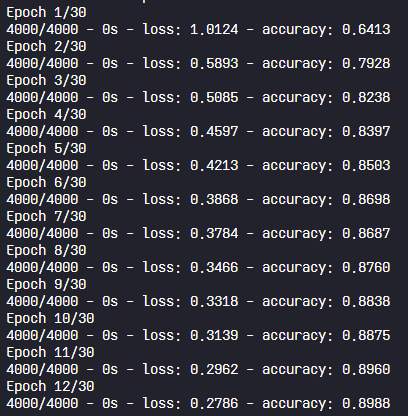

...

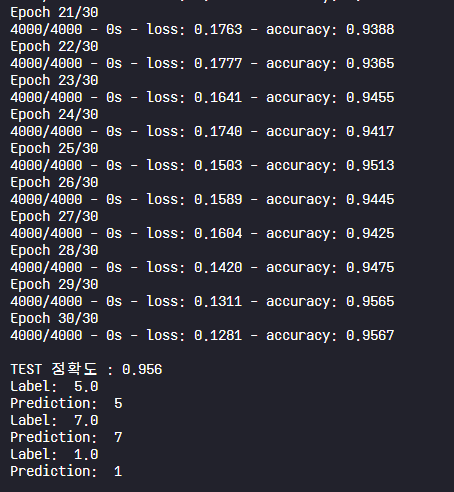

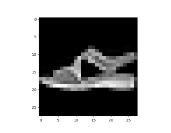

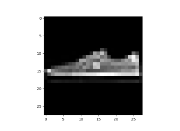

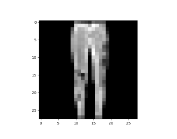